In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

file_path = 'data.csv'

data = pd.read_csv(file_path)

data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)
# data_model = data.drop("region", axis=1)
# print(data_model)

region_dummies = pd.get_dummies(data['region'], prefix='is', prefix_sep='_')


# Concaténer les colonnes binaires avec le DataFrame original
data = pd.concat([data, region_dummies], axis=1)
data = data.drop(['region'], axis=1)


# Afficher le DataFrame avec les nouvelles colonnes binaires
print(data.head())


   age  sex     bmi  children  smoker      charges  is_northeast  \
0   19    1  27.900         0       1  16884.92400         False   
1   18    0  33.770         1       0   1725.55230         False   
2   28    0  33.000         3       0   4449.46200         False   
3   33    0  22.705         0       0  21984.47061         False   
4   32    0  28.880         0       0   3866.85520         False   

   is_northwest  is_southeast  is_southwest  
0         False         False          True  
1         False          True         False  
2         False          True         False  
3          True         False         False  
4          True         False         False  


In [58]:
# Vérification des informations manquantes et des doublons
missing_data = data.isnull().sum()
duplicates = data.duplicated().sum()

print(f"missing_data : {missing_data}, duplicates : {duplicates}")

missing_data : age             0
sex             0
bmi             0
children        0
smoker          0
charges         0
is_northeast    0
is_northwest    0
is_southeast    0
is_southwest    0
dtype: int64, duplicates : 1


In [59]:
# Suppression du doublon
data = data.drop_duplicates()

In [60]:
# Afficher les colonnes pour ensuite créer des graphiques univariées
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'is_northeast',
       'is_northwest', 'is_southeast', 'is_southwest'],
      dtype='object')

Les données suivent -elles une distribution normale ?

Text(0.5, 1.0, 'Histogramme du bmi avec KDE')

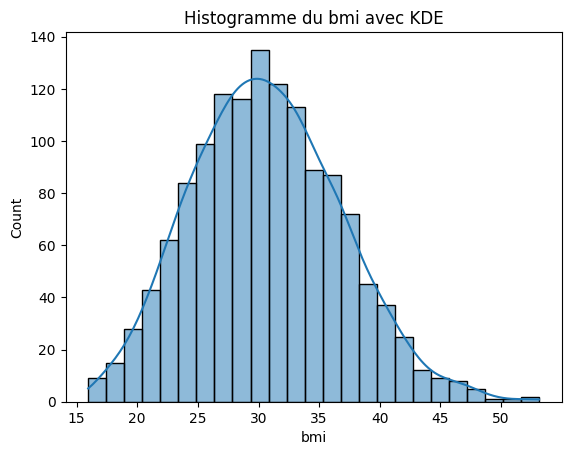

In [61]:
import matplotlib.pyplot as plt
sns.histplot(data['bmi'], kde=True,)

plt.title("Histogramme du bmi avec KDE")


Est-ce qu’il y a des valeurs aberrantes ?

Axes(0.125,0.11;0.775x0.77)


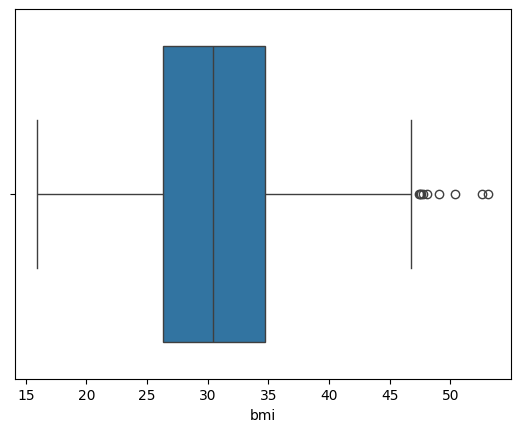

In [94]:
print(sns.boxplot(x =data['bmi']))

 faire une Analyse univariée de chaque variable

Text(0, 0.5, 'Nombre')

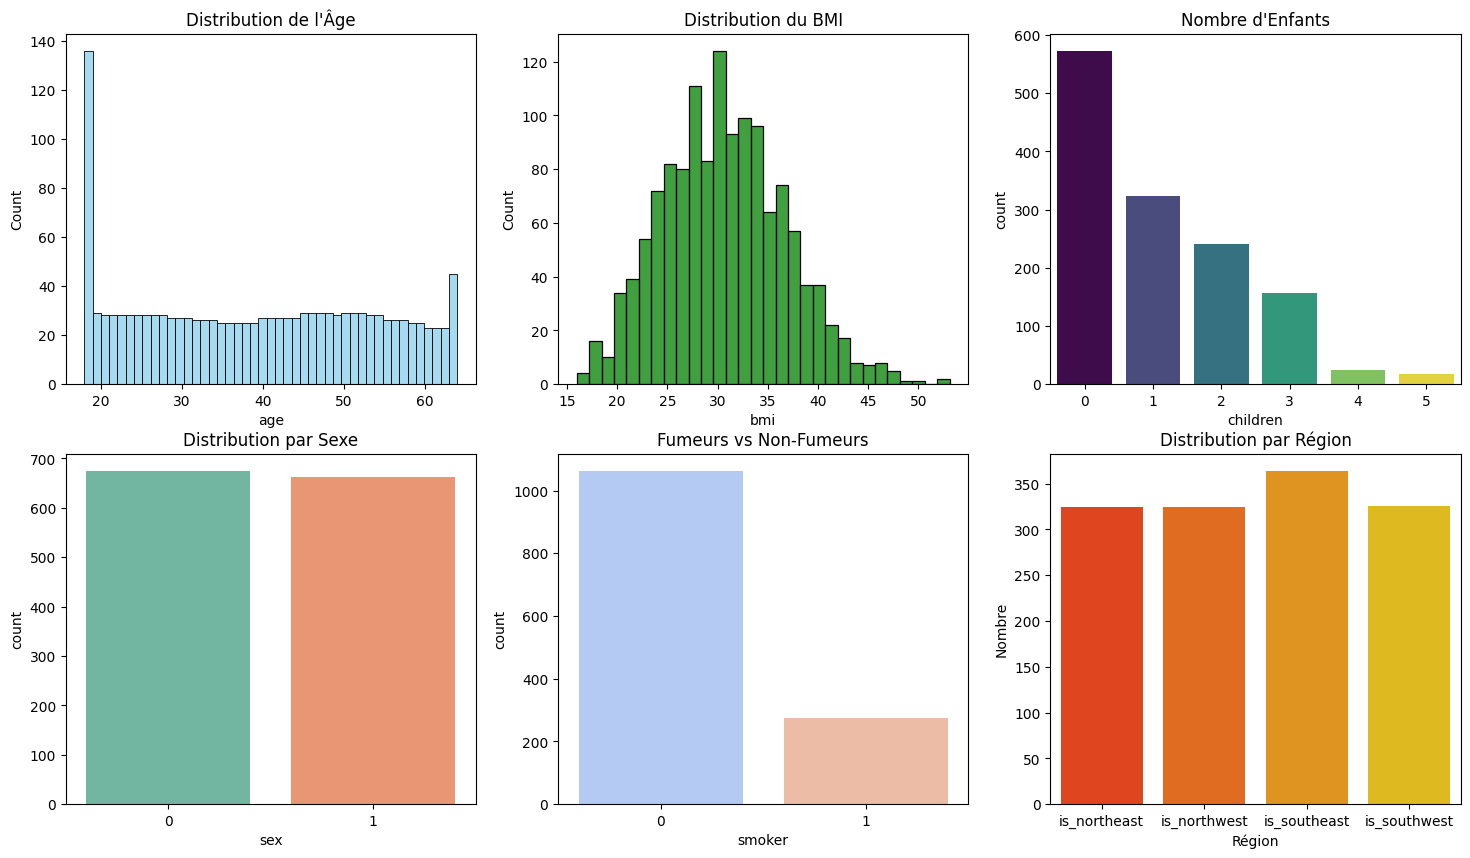

In [73]:
# Analyse univariée de chaque variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Distribution de l'âge
sns.histplot(data['age'], bins=45, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution de l\'Âge')

# Distribution du BMI
sns.histplot(data['bmi'], bins=30, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution du BMI')

# Distribution du Nombre d'Enfants
sns.countplot(x='children', data=data, hue='children', ax=axes[0, 2], palette='viridis', legend=False)
axes[0, 2].set_title('Nombre d\'Enfants')

# Distribution par Sexe
sns.countplot(x='sex', data=data, hue='sex', ax=axes[1, 0], palette='Set2', legend=False)
axes[1, 0].set_title('Distribution par Sexe')

# Distribution Fumeurs / Non-Fumeurs
sns.countplot(x='smoker', data=data, hue='smoker', ax=axes[1, 1], palette='coolwarm', legend=False)
axes[1, 1].set_title('Fumeurs vs Non-Fumeurs')

# Distribution par Région
region_cols = ['is_northeast', 'is_northwest', 'is_southeast', 'is_southwest']
region_counts = data[region_cols].sum()

sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, ax=axes[1, 2], palette='autumn', legend=False)
axes[1, 2].set_title('Distribution par Région')
axes[1, 2].set_xlabel('Région')
axes[1, 2].set_ylabel('Nombre')





In [74]:
# Constatations de grandes valeurs pour les tranchesd'âges 18 et 19 ans
# TODO : recherche sur internet des éventuelles raisons, causes, effets...
occurence_age = data['age'].value_counts()
occurence_age_sorted = occurence_age.sort_index()
occurence_age_sorted.head()

age
18    69
19    67
20    29
21    28
22    28
Name: count, dtype: int64